This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

## Be sure to watch the 3blue1brown videos on neural networks:

https://www.3blue1brown.com/topics/neural-networks

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

The core building block of neural networks is the layer. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

Here, our model consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax classification layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make the model ready for training, we need to pick three more things as part of the compilation step:

An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.

A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

We’re now ready to train the model, which in Keras is done via a call to the model’s fit() method—we fit the model to its training data.

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8673 - loss: 0.4459
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1181
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0709
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0374


**Using the model to make predictions**

Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data. We quickly reach an accuracy of 0.989 (98.9%) on the training data.

Now that we have a trained model, we can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set.

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([1.4489430e-08, 2.9613216e-09, 2.9478913e-06, 2.1056350e-05,
       1.0878012e-11, 2.1259142e-08, 4.6719581e-12, 9.9997550e-01,
       1.1031207e-07, 4.0367644e-07], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i.

This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7:

In [13]:
predictions[0].argmax()

np.int64(7)

In [14]:
predictions[0][7]

np.float32(0.9999755)

In [15]:
test_labels[0]

np.uint8(7)

**Evaluating the model on new data**

The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training-set accuracy (98.9%). This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine learning models tend to perform worse on new data than on their training data. Overfitting is a central topic in chapter 3.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.9764 - loss: 0.0730
test_acc: 0.9804999828338623


## Data representations for neural networks

In the previous example, we started from data stored in multidimensional NumPy arrays, also called tensors. In general, all current machine learning systems use tensors as their basic data structure. Tensors are fundamental to the field—so fundamental that TensorFlow was named after them. So what’s a tensor?

At its core, a tensor is a container for data—usually numerical data. So, it’s a container for numbers. You may be already familiar with matrices, which are rank-2 tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).

### Scalars (rank-0 tensors)

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

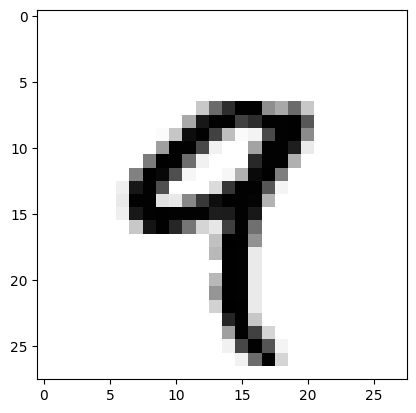

In [27]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
train_labels[4]

np.uint8(9)

### Manipulating tensors in NumPy

In [29]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[:, 14:, 14:]

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [34]:
batch = train_images[:128]

In [35]:
batch = train_images[128:256]

In [36]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)  # if greater than zero, return that value, if less than zero return zero
    return x

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [39]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [40]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.40 s


### Broadcasting

https://numpy.org/doc/stable/user/basics.broadcasting.html

Our earlier naive implementation of naive_add only supports the addition of rank-2 tensors with identical shapes. But in the Dense layer introduced earlier, we added a rank-2 tensor with a vector. What happens with addition when the shapes of the two tensors being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be broadcast to match the shape of the larger tensor. Broadcasting consists of two steps:

Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.

The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

Let’s look at a concrete example. Consider X with shape (32, 10) and y weth shap
e (10,):

In [41]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [42]:
y = np.expand_dims(y, axis=0)

X is a random matrix with shape (32, 10).

❷ y is a random vector with shape (10,).

First, we add an empty first axis to y, whose shape becomes (1, 10):

In [43]:
Y = np.concatenate([y] * 32, axis=0)

Repeat y 32 times along axis 0 to obtain Y, which has shape (32, 10).

At this point, we can proceed to add X and Y, because they have the same shape.

In terms of implementation, no new rank-2 tensor is created, because that would be terribly inefficient. The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level. But thinking of the vector being repeated 10 times alongside a new axis is a helpful mental model. Here’s what a naive implementation would look like:

In [44]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

❶ x is a rank-2 NumPy tensor.

❷ y is a NumPy vector.

❸ Avoid overwriting the input tensor.

With broadcasting, you can generally perform element-wise operations that take two inputs tensors if one tensor has shape (a, b, ... n, n + 1, ... m) and the other has shape (n, n + 1, ... m). The broadcasting will then automatically happen for axes a through n - 1.

The following example applies the element-wise maximum operation to two tensors of different shapes via broadcasting:

In [45]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product
The tensor product, or dot product (not to be confused with an element-wise product, the * operator), is one of the most common, most useful tensor operations.

In NumPy, a tensor product is done using the np.dot function (because the mathematical notation for tensor product is usually a dot):

In [46]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [47]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [48]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [49]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [50]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [51]:
train_images = train_images.reshape((60000, 28 * 28))

In [52]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [53]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [54]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

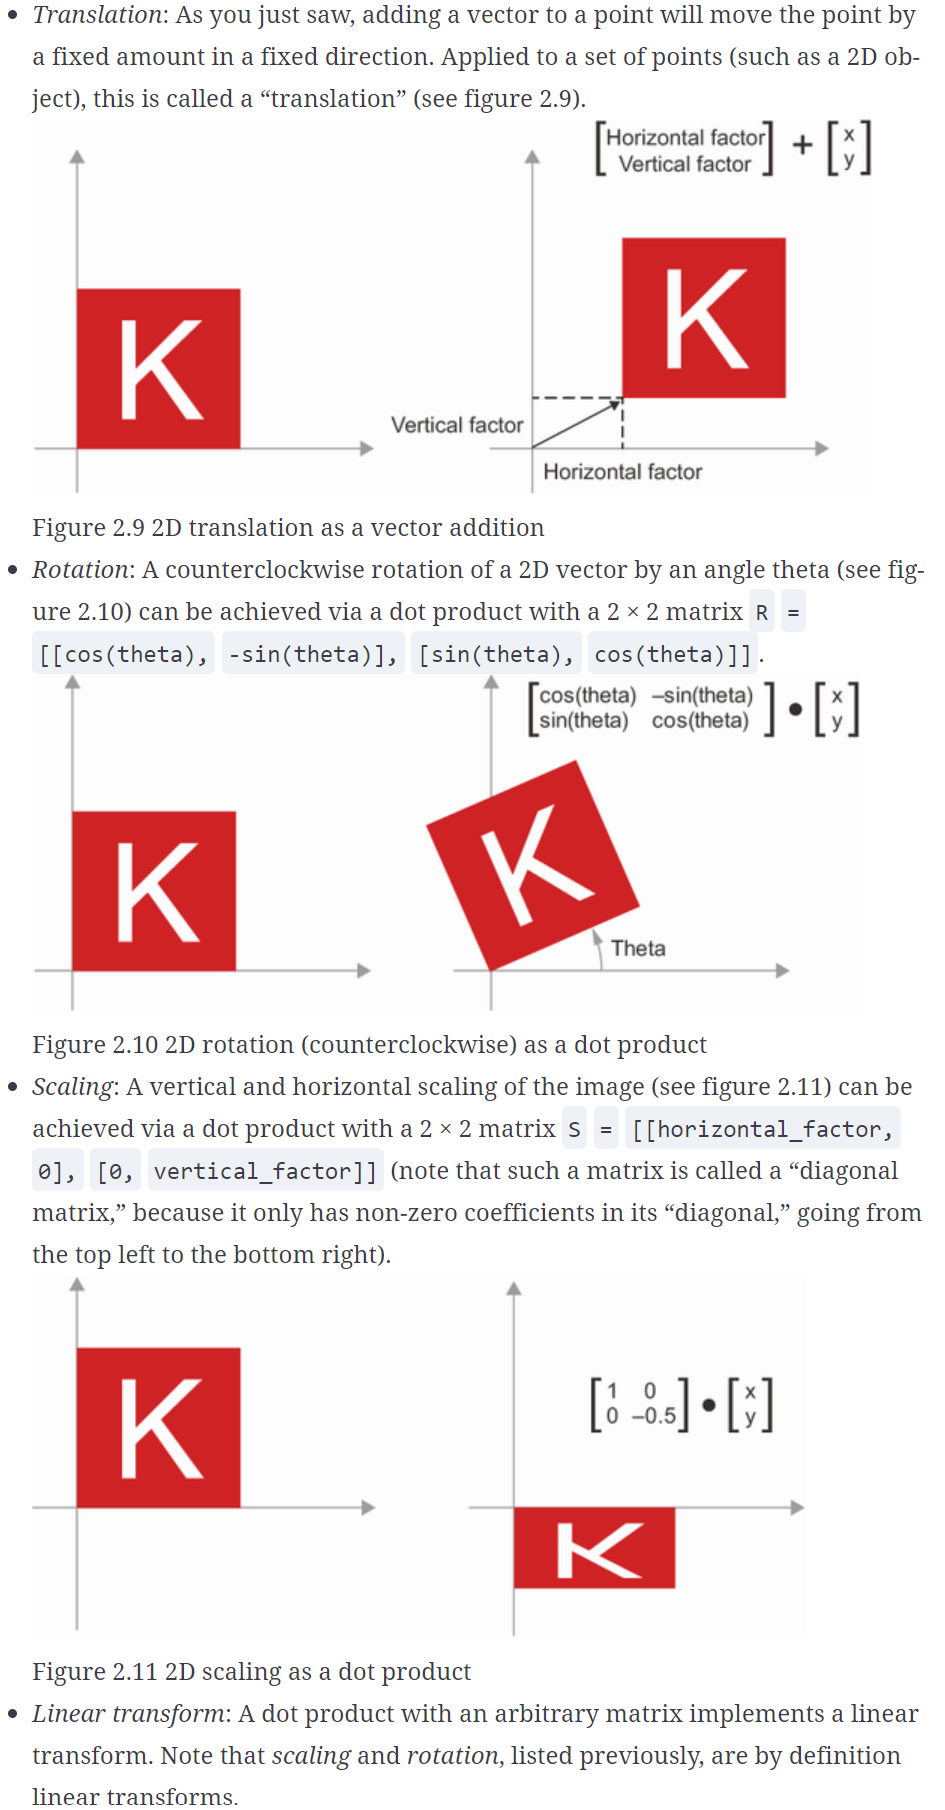
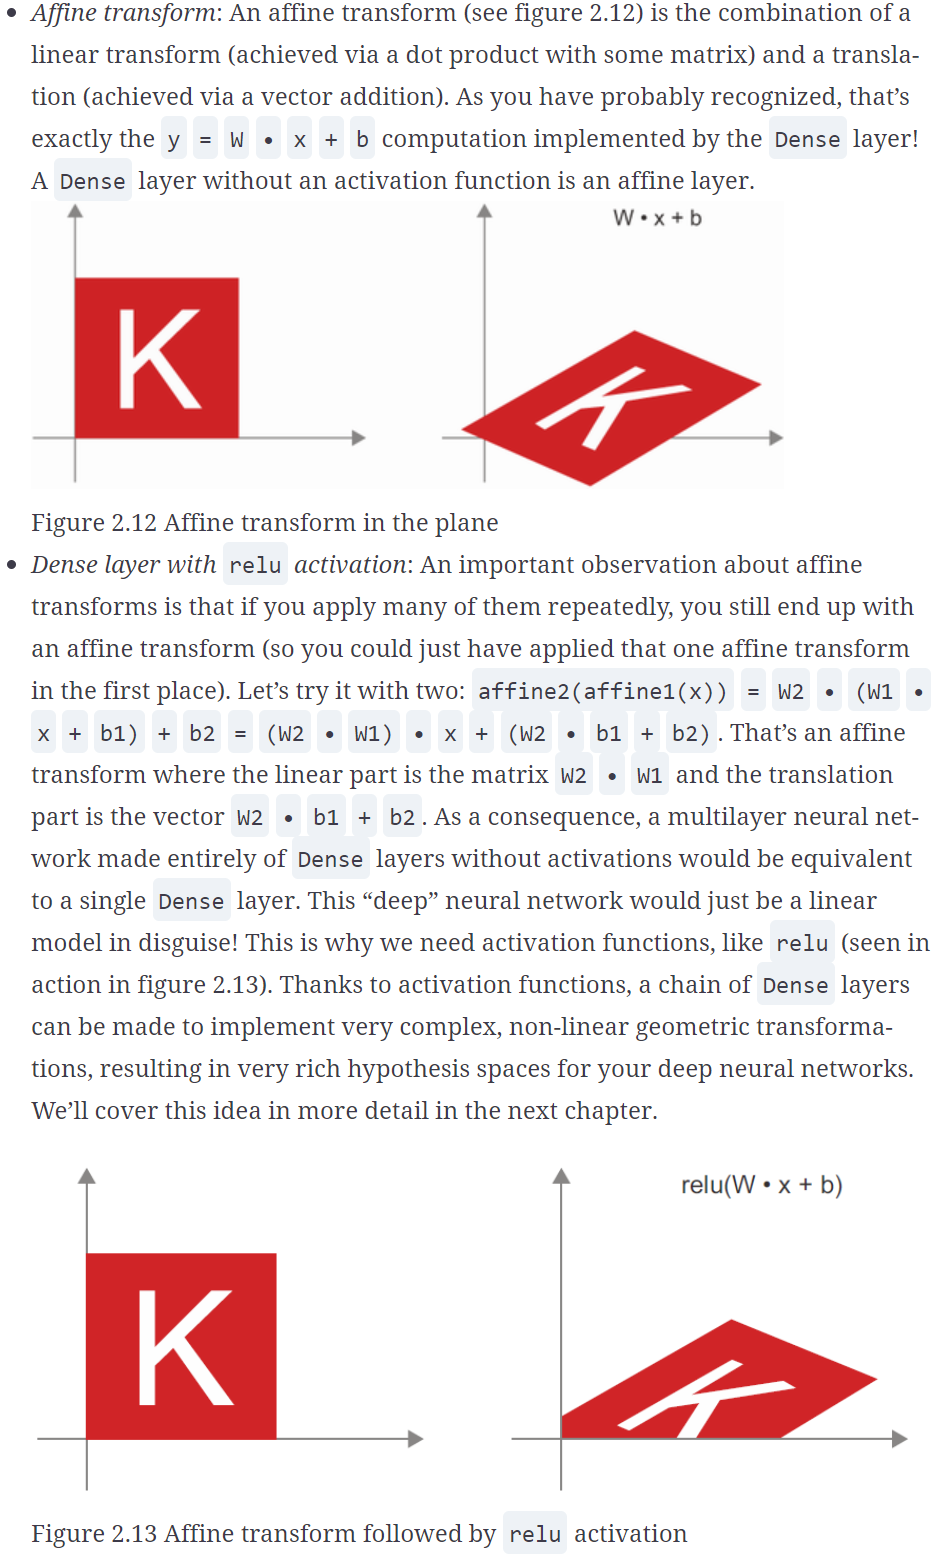

### A geometric interpretation of deep learning

You just learned that neural networks consist entirely of chains of tensor operations, and that these tensor operations are just simple geometric transformations of the input data. It follows that you can interpret a neural network as a very complex geometric transformation in a high-dimensional space, implemented via a series of simple steps.

In 3D, the following mental image may prove useful. Imagine two sheets of colored paper: one red and one blue. Put one on top of the other. Now crumple them together into a small ball. That crumpled paper ball is your input data, and each sheet of paper is a class of data in a classification problem. What a neural network is meant to do is figure out a transformation of the paper ball that would uncrumple it, so as to make the two classes cleanly separable again (see figure 2.14). With deep learning, this would be implemented as a series of simple transformations of the 3D space, such as those you could apply on the paper ball with your fingers, one movement at a time.



Figure 2.14 Uncrumpling a complicated manifold of data

Uncrumpling paper balls is what machine learning is about: finding neat representations for complex, highly folded data manifolds in high-dimensional spaces (a manifold is a continuous surface, like our crumpled sheet of paper). At this point, you should have a pretty good intuition as to why deep learning excels at this: it takes the approach of incrementally decomposing a complicated geometric transformation into a long chain of elementary ones, which is pretty much the strategy a human would follow to uncrumple a paper ball. Each layer in a deep network applies a transformation that disentangles the data a little, and a deep stack of layers makes tractable an extremely complicated disentanglement process.

## The engine of neural networks: gradient-based optimization

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

As you saw in the previous section, each neural layer from our first model example transforms its input data as follows:

output = relu(dot(input, W) + b)
In this expression, W and b are tensors that are attributes of the layer. They’re called the weights or trainable parameters of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the model from exposure to training data.

Initially, these weight matrices are filled with small random values (a step called random initialization). Of course, there’s no reason to expect that relu(dot(input, W) + b), when W and b are random, will yield any useful representations. The resulting representations are meaningless—but they’re a starting point. What comes next is to gradually adjust these weights, based on a feedback signal. This gradual adjustment, also called training, is the learning that machine learning is all about.

This happens within what’s called a training loop, which works as follows. Repeat these steps in a loop, until the loss seems sufficiently low:

Draw a batch of training samples, x, and corresponding targets, y_true.

Run the model on x (a step called the forward pass) to obtain predictions, y_pred.

Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.

Update all weights of the model in a way that slightly reduces the loss on this batch.

You’ll eventually end up with a model that has a very low loss on its training data: a low mismatch between predictions, y_pred, and expected targets, y_true. The model has “learned” to map its inputs to correct targets. From afar, it may look like magic, but when you reduce it to elementary steps, it turns out to be simple.

Step 1 sounds easy enough—just I/O code. Steps 2 and 3 are merely the application of a handful of tensor operations, so you could implement these steps purely from what you learned in the previous section. The difficult part is step 4: updating the model’s weights. Given an individual weight coefficient in the model, how can you compute whether the coefficient should be increased or decreased, and by how much?

### What's a derivative?

### Derivative of a tensor operation: the gradient

Gradient descent is the optimization technique that powers modern neural networks. Here’s the gist of it. All of the functions used in our models (such as dot or +) transform their input in a smooth and continuous way: if you look at z = x + y, for instance, a small change in y only results in a small change in z, and if you know the direction of the change in y, you can infer the direction of the change in z. Mathematically, you’d say these functions are differentiable. If you chain together such functions, the bigger function you obtain is still differentiable. In particular, this applies to the function that maps the model’s coefficients to the loss of the model on a batch of data: a small change in the model’s coefficients results in a small, predictable change in the loss value. This enables you to use a mathematical operator called the gradient to describe how the loss varies as you move the model’s coefficients in different directions. If you compute this gradient, you can use it to move the coefficients (all at once in a single update, rather than one at a time) in a direction that decreases the loss.

The function we were just looking at turned a scalar value x into another scalar value y: you could plot it as a curve in a 2D plane. Now imagine a function that turns a tuple of scalars (x, y) into a scalar value z: that would be a vector operation. You could plot it as a 2D surface in a 3D space (indexed by coordinates x, y, z). Likewise, you can imagine functions that take matrices as inputs, functions that take rank-3 tensors as inputs, etc.

The concept of derivation can be applied to any such function, as long as the surfaces they describe are continuous and smooth. The derivative of a tensor operation (or tensor function) is called a gradient. Gradients are just the generalization of the concept of derivatives to functions that take tensors as inputs. Remember how, for a scalar function, the derivative represents the local slope of the curve of the function? In the same way, the gradient of a tensor function represents the curvature of the multidimensional surface described by the function. It characterizes how the output of the function varies when its input parameters vary.

Let’s look at an example grounded in machine learning. Consider

An input vector, x (a sample in a dataset)

A matrix, W (the weights of a model)

A target, y_true (what the model should learn to associate to x)

A loss function, loss (meant to measure the gap between the model’s current predictions and y_true)

You can use W to compute a target candidate y_pred, and then compute the loss, or mismatch, between the target candidate y_pred and the target y_true:

### Stochastic gradient descent
Given a differentiable function, it’s theoretically possible to find its minimum analytically: it’s known that a function’s minimum is a point where the derivative is 0, so all you have to do is find all the points where the derivative goes to 0 and check for which of these points the function has the lowest value.

Applied to a neural network, that means finding analytically the combination of weight values that yields the smallest possible loss function. This can be done by solving the equation grad(f(W), W) = 0 for W. This is a polynomial equation of N variables, where N is the number of coefficients in the model. Although it would be possible to solve such an equation for N = 2 or N = 3, doing so is intractable for real neural networks, where the number of parameters is never less than a few thousand and can often be several tens of millions.

Instead, you can use the four-step algorithm outlined at the beginning of this section: modify the parameters little by little based on the current loss value for a random batch of data. Because you’re dealing with a differentiable function, you can compute its gradient, which gives you an efficient way to implement step 4. If you update the weights in the opposite direction from the gradient, the loss will be a little less every time:

Draw a batch of training samples, x, and corresponding targets, y_true.

Run the model on x to obtain predictions, y_pred (this is called the forward pass).

Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.

Compute the gradient of the loss with regard to the model’s parameters (this is called the backward pass).

Move the parameters a little in the opposite direction from the gradient—for example, W -= learning_rate * gradient—thus reducing the loss on the batch a bit. The learning rate (learning_rate here) would be a scalar factor modulating the “speed” of the gradient descent process.

Easy enough! What we just described is called mini-batch stochastic gradient descent (mini-batch SGD). The term stochastic refers to the fact that each batch of data is drawn at random (stochastic is a scientific synonym of random). Figure 2.18 illustrates what happens in 1D, when the model has only one parameter and you have only one 
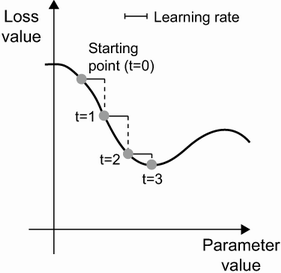
As you can see, intuitively it’s important to pick a reasonable value for the learning_ rate factor. If it’s too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum. If learning_rate is too large, your updates may end up taking you to completely random locations on the curve.

Note that a variant of the mini-batch SGD algorithm would be to draw a single sample and target at each iteration, rather than drawing a batch of data. This would be true SGD (as opposed to mini-batch SGD). Alternatively, going to the opposite extreme, you could run every step on all data available, which is called batch gradient descent. Each update would then be more accurate, but far more expensive. The efficient compromise between these two extremes is to use mini-batches of reasonable size.

Although figure 2.18 illustrates gradient descent in a 1D parameter space, in practice you’ll use gradient descent in highly dimensional spaces: every weight coefficient in a neural network is a free dimension in the space, and there may be tens of thousands or even millions of them. To help you build intuition about loss surfaces, you can also visualize gradient descent along a 2D loss surface, as shown in figure 2.19. But you can’t possibly visualize what the actual process of training a neural network looks like—you can’t represent a 1,000,000-dimensional space in a way that makes sense to humans. As such, it’s good to keep in mind that the intuitions you develop through these low-dimensional representations may not always be accurate in practice. This has historically been a source of issues in the world of deep learning resea

Additionally, there exist multiple variants of SGD that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the current value of the gradients. There is, for instance, SGD with momentum, as well as Adagrad, RMSprop, and several others. Such variants are known as optimization methods or optimizers. In particular, the concept of momentum, which is used in many of these variants, deserves your attention. Momentum addresses two issues with SGD: convergence speed and local minima. Consider figure 2.20, which shows the curve of a loss as a function of a model parameter.
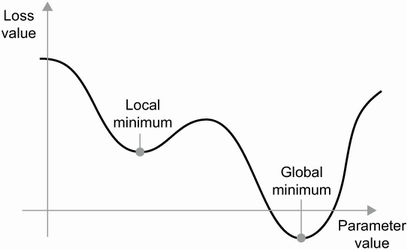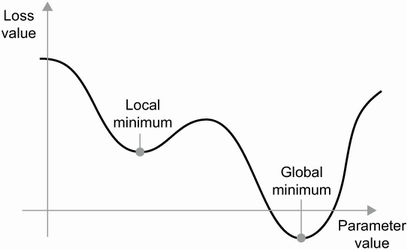
As you can see, around a certain parameter value, there is a local minimum: around that point, moving left would result in the loss increasing, but so would moving right. If the parameter under consideration were being optimized via SGD with a small learning rate, the optimization process could get stuck at the local minimum instead of making its way to the global minimum.

You can avoid such issues by using momentum, which draws inspiration from physics. A useful mental image here is to think of the optimization process as a small ball rolling down the loss curve. If it has enough momentum, the ball won’t get stuck in a ravine and will end up at the global minimum. Momentum is implemented by moving the ball at each step based not only on the current slope value (current acceleration) but also on the current velocity (resulting from past acceleration). In practice, this means updating the parameter w based not only on the current gradient value but also on the previous parameter updaterch.training sample.

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

A useful way to think about backpropagation is in terms of computation graphs. A computation graph is the data structure at the heart of TensorFlow and the deep learning revolution in general. It’s a directed acyclic graph of operations—in our case, tensor operations. For instance, figure 2.21 shows the graph representation of our first model.
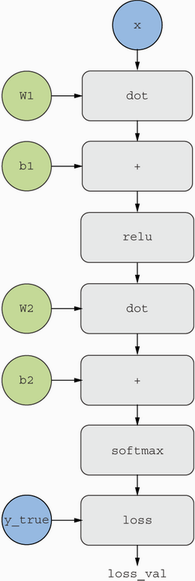
Computation graphs have been an extremely successful abstraction in computer science because they enable us to treat computation as data: a computable expression is encoded as a machine-readable data structure that can be used as the input or output of another program. For instance, you could imagine a program that receives a computation graph and returns a new computation graph that implements a large-scale distributed version of the same computation—this would mean that you could distribute any computation without having to write the distribution logic yourself. Or imagine a program that receives a computation graph and can automatically generate the derivative of the expression it represents. It’s much easier to do these things if your computation is expressed as an explicit graph data structure rather than, say, lines of ASCII characters in a .py file.

To explain backpropagation clearly, let’s look at a really basic example of a computation graph (see figure 2.22). We’ll consider a simplified version of figure 2.21, where we only have one linear layer and where all variables are scalar. We’ll take two scalar variables w and b, a scalar input x, and apply some operations to them to combine them into an output y. Finally, we’ll apply an absolute value error-loss function: loss_val = abs(y_true - y). Since we want to update w and b in a way that will minimize loss_val, we are interested in computing grad(loss_val, b) and grad(loss _val, w
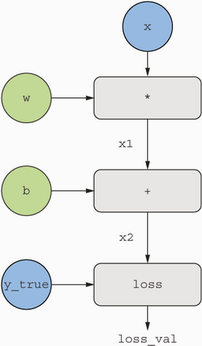
Let’s set concrete values for the “input nodes” in the graph, that is to say, the input x, the target y_true, w, and b. We’ll propagate these values to all nodes in the graph, from top to bottom, until we reach loss_val. This is the forward pass
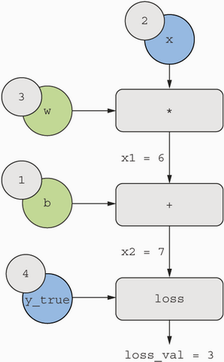
Now let’s “reverse” the graph: for each edge in the graph going from A to B, we will create an opposite edge from B to A, and ask, how much does B vary when A varies? That is to say, what is grad(B, A)? We’ll annotate each inverted edge with this value. This backward graph represents the backward pass
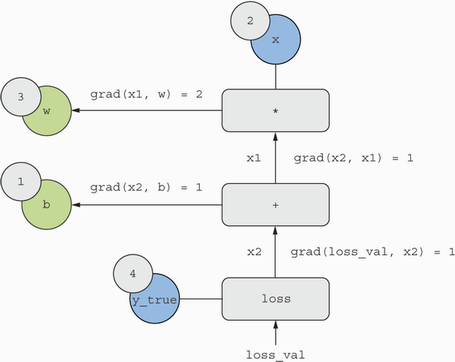
We have the following:

grad(loss_val, x2) = 1, because as x2 varies by an amount epsilon, loss_val = abs(4 - x2) varies by the same amount.

grad(x2, x1) = 1, because as x1 varies by an amount epsilon, x2 = x1 + b = x1 + 1 varies by the same amount.

grad(x2, b) = 1, because as b varies by an amount epsilon, x2 = x1 + b = 6 + b varies by the same amount.

grad(x1, w) = 2, because as w varies by an amount epsilon, x1 = x * w = 2 * w varies by 2 * epsilon.

What the chain rule says about this backward graph is that you can obtain the derivative of a node with respect to another node by multiplying the derivatives for each edge along the path linking the two nodes. For instance, grad(loss_val, w) = grad(loss_val, x2) * grad(x2, x1) * g
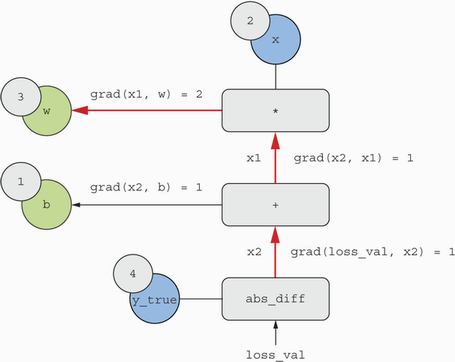
By applying the chain rule to our graph, we obtain what we were looking for:

grad(loss_val, w) = 1 * 1 * 2 = 2

grad(loss_val, b) = 1 * 1 = 1

NOTE If there are multiple paths linking the two nodes of interest, a and b, in the backward graph, we would obtain grad(b, a) by summing the contributions of all the paths.

And with that, you just saw backpropagation in action! Backpropagation is simply the application of the chain rule to a computation graph. There’s nothing more to it. Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, computing the contribution that each parameter had in the loss value. That’s where the name “backpropagation” comes from: we “back propagate” the loss contributions of different nodes in a computation graph.

Nowadays people implement neural networks in modern frameworks that are capable of automatic differentiation, such as TensorFlow. Automatic differentiation is implemented with the kind of computation graph you’ve just seen. Automatic differentiation makes it possible to retrieve the gradients of arbitrary compositions of differentiable tensor operations without doing any extra work besides writing down the for
ward pass.rad(x1, w)).

#### The gradient tape in TensorFlow

The API through which you can leverage TensorFlow’s powerful automatic differentiation capabilities is the GradientTape. It’s a Python scope that will “record” the tensor operations that run inside it, in the form of a computation graph (sometimes called a “tape”). This graph can then be used to retrieve the gradient of any output with respect to any variable or set of variables (instances of the tf.Variable class). A tf.Variable is a specific kind of tensor meant to hold mutable state—for instance, the weights of a neural network are always tf.Variable instances.


In [55]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

❶ Instantiate a scalar Variable with an initial value of 0.

❷ Open a GradientTape scope.

❸ Inside the scope, apply some tensor operations to our variable.

❹ Use the tape to retrieve the gradient of the output y with respect to our variable x.

The GradientTape works with tensor operations:

In [56]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

❶ Instantiate a Variable with shape (2, 2) and an initial value of all zeros.

❷ grad_of_y_wrt_x is a tensor of shape (2, 2) (like x) describing the curvature of y = 2 * a + 3 around x = [[0, 0], [0, 0]].

It also works with lists of variables:

In [57]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((1, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print("W:\n",W)
print("b:\n",b)
print("y:\n",y)
print("x:\n",x)
print("gradient of y wrt W and b:\n",grad_of_y_wrt_W_and_b)

W:
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.08438599, 0.93146133],
       [0.29447472, 0.1278044 ]], dtype=float32)>
b:
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
y:
 tf.Tensor([[0.24420154 0.18174964]], shape=(1, 2), dtype=float32)
x:
 tf.Tensor([[0.08466816 0.80501556]], shape=(1, 2), dtype=float32)
gradient of y wrt W and b:
 [<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.08466816, 0.08466816],
       [0.80501556, 0.80501556]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>]


❶ matmul is how you say “dot product” in TensorFlow.

❷ grad_of_y_wrt_W_and_b is a list of two tensors with the same shapes as W and b, respectively.

## Example showing gradient and y in same plot

gradient:
 tf.Tensor([  0.   3.  12.  27.  48.  75. 108. 147. 192. 243.], shape=(10,), dtype=float32)
y: 
 tf.Tensor([  3.   4.  11.  30.  67. 128. 219. 346. 515. 732.], shape=(10,), dtype=float32)


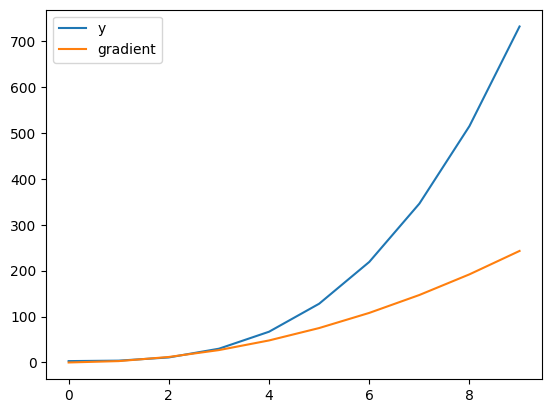

In [58]:
import matplotlib.pyplot as plt
import numpy as np
x = tf.Variable(np.float32(np.arange(10)))
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x*x*x + 3  # dy/dx = n*x^n-1 so slope at any x is simply 3x^2
grad = tape.gradient(y, x)
    
print("gradient:\n",grad)
print("y: \n",y)
plt.plot(x,y, label = 'y')
plt.plot(x,np.array(grad), label = 'gradient')
plt.legend()
plt.show()

## Looking back at our first example
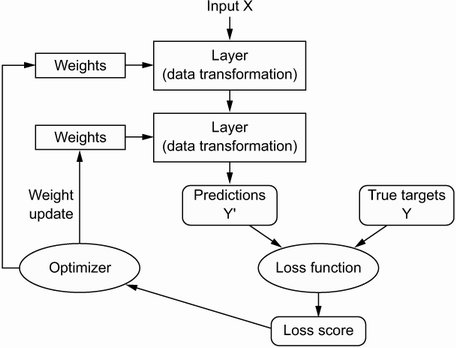

In [59]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [60]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [61]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [62]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)  

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8728 - loss: 0.4409
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1182
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9776 - loss: 0.0748
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0501
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0368


## Very simple model showing how the forward pass calculations can be done as matrix math

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Calling a model for the first time to build it**

Builds the model—now the model will expect samples of shape (3,). The None in the input shape signals that the batch size could be anything.

In [64]:
import numpy as np

model.build(input_shape=(None, 3))
# weights are only initialized after it knows the input data shape.  None is number of rows of input data, 3 is the number of columns of the input data

print("Shape of the weights:")
print("Dense layer weights: ", np.array(model.weights[0]).shape)  # 3 columns of input data, 64 neurons
print("Dense layer bias: ", np.array(model.weights[1]).shape)  # 64 neurons, one bias value for each
print("Dense layer weights: ", np.array(model.weights[2]).shape)  # output layer has 10 neurons, 64 inputs from previous layer
print("Dense layer bias: ", np.array(model.weights[3]).shape)  # 10 neurons, 10 bias values

x = np.random.randn(20,3)
print("Shape of the input:")
print(x.shape)  # 20 rows of data, 3 features each

# You should use model(x) when you need to retreive the gradients of the model call and model.predict(x) if you just need the output value.
modelout = model(x)  # y is output of model when matrix x is the input to the model
print("Shape of the output:")  # 20 rows of data, 10 neurons for the output
print(modelout.shape)

Shape of the weights:
Dense layer weights:  (3, 64)
Dense layer bias:  (64,)
Dense layer weights:  (64, 10)
Dense layer bias:  (10,)
Shape of the input:
(20, 3)
Shape of the output:
(20, 10)


## Manual calculation using matrix math to compare the forward pass

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.
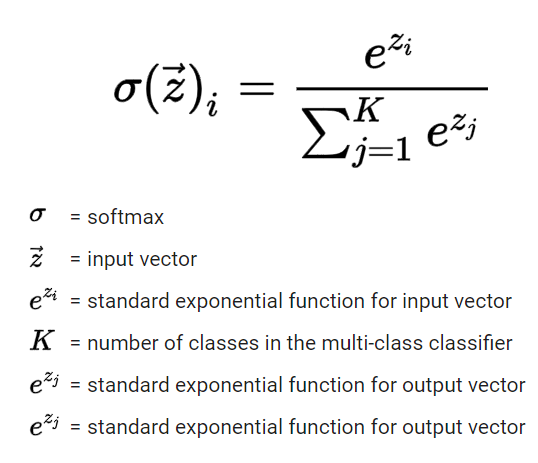

In [65]:
# Define the softmax function

def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # necessary step to do broadcasting
    return e_x / div

### Manually compute output of model

In [66]:
# numpy maximum: Compare two arrays and return a new array containing the element-wise maxima.  The zero is broadcast to the shape of array.
# layer 1
layer1 = np.maximum(x @ np.array(model.weights[0]) + np.array(model.weights[1]), 0)  # np.maximum does the relu function (np.max() will not work)
# layer 2
layer2 = softmax( layer1 @ np.array(model.weights[2]) + np.array(model.weights[3]))  # softmax for the last layer
np.allclose(layer2,modelout)  # modelout is the output of the model, layer2 is the output of the matrix math.  They are the same.

True

## Now build a manual model, and assign those weights to tensorflow to see if they match
Create the weights and biases with np.random.randn()
Do the calculations to compute model output, z2

In [67]:
# model layer 1 will be dense with 64 activation relu
weightsL1 = np.random.randn(3,64)
biasL1 = np.random.randn(64,)
weightsL2 = np.random.randn(64,10)
biasL2 = np.random.randn(10,)

x = np.random.randn(20,3)
# now pass x data through model to get z2
# layer 1
layer1 = np.maximum(x @ weightsL1 + biasL1, 0)  # np.maximum does the relu function (np.max() will not work)
# layer 2
layer2 = softmax( layer1 @ weightsL2 + biasL2)  # softmax for the last layer

### Now build tensorflow model, then assign weights and bias's that we created above to tensorflow model

In [68]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.build(input_shape=(None, 3))  # build model so it has weights matrices
# Now assign new values to the trainable weights and bias matrices using the values computed above
model.trainable_variables[0].assign(weightsL1)
model.trainable_variables[1].assign(biasL1)
model.trainable_variables[2].assign(weightsL2)
model.trainable_variables[3].assign(biasL2)
modelout = model(x)  # pass x through the model in forward pass and y is the result

In [69]:
np.allclose(layer2,modelout)  # modelout is the output of the model, layer2 is the output of the matrix math.  They are the same.

True

# now perform a single step of updating the weights

In [70]:
labels = np.random.randint(0, 10, size = 20)
labels

array([0, 4, 8, 2, 1, 3, 1, 9, 0, 7, 0, 8, 0, 5, 0, 6, 3, 7, 1, 2])

In [71]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)  # subtracts gradient times the learning rate from the model weights


### sparse categorical crossentropy
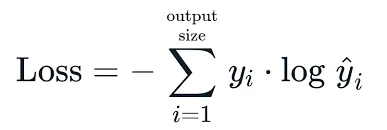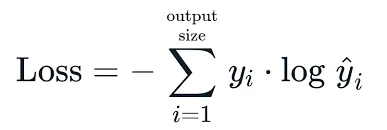

In [72]:
import copy
before_weights = copy.deepcopy(model.weights[0])  # make a copy so we can compare
with tf.GradientTape() as tape:  # gradient tape calculates the gradient (slope) and puts it in tape.gradient
    predictions = model(x)  # put input values into tensorflow model defined above 
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)  # Computes the mean of elements across dimensions of a tensor.
gradients = tape.gradient(average_loss, model.weights)  # returns gradients
update_weights(gradients, model.weights)  # subtracts gradient times teh learning rate from the model weights
modelout = model(x)  # get the output of the model after one epoch (done with full x dataset, not a mini batch)
print("\n\n",model.weights[0])
print("\n\n",before_weights)



 <Variable path=sequential_3/dense_6/kernel, shape=(3, 64), dtype=float32, value=[[ 1.6706111  -0.639808   -0.72877973  0.37385586  0.34563655  0.5679703
  -0.25726146 -0.26991114 -0.16428635  0.46328995  0.24630408  0.6428822
   0.12228361  1.1287744   0.8749988   0.6827346  -0.5081004   0.5085851
  -0.20457597 -1.5587033   1.4840672  -1.9165293   1.665628   -0.21491024
   0.53160655 -0.2984156   0.14681298 -0.2500827   0.3374922   0.79229695
  -1.2218232   0.7725046  -1.1902366  -1.2561033  -1.3434308  -1.3138603
  -0.45359725  0.70240057 -0.8657509   0.15523843  0.29786834 -1.5416312
   0.60380864 -0.30749068 -0.21196903 -0.82862335 -0.34122556  0.2217386
   0.2039264   1.650388   -1.3257838   0.15775876 -1.4246821   0.21943787
   0.62508994  1.6844484   0.37966707 -1.8396585   0.07635029  1.7273887
  -0.46976945 -2.3799326  -1.2746141  -0.21914767]
 [ 1.3659749   0.75396705 -0.37739667  0.82040906 -1.0341831   1.3790603
  -0.8359698  -1.1176916   2.3390577  -1.2390134   0.1386995

In [73]:
# calculate output from layer 1
layer1 = np.maximum(x @ np.array(model.weights[0]) + np.array(model.weights[1]), 0)  # np.maximum does the relu function (np.max() will not work)
# calculate output from layer 2
layer2 = softmax( layer1 @ np.array(model.weights[2]) + np.array(model.weights[3]))  # softmax for the last layer
np.allclose(layer2,modelout)  # modelout is the output of the model, layer2 is the output of the matrix math.  They are the same.

True

In [74]:
gradients[0]  # show the gradients (slope) as calculated by the gradient tape for first layer
# shape is 3 x 64 (3 features, 64 neurons)

<tf.Tensor: shape=(3, 64), dtype=float32, numpy=
array([[ 7.32916873e-03, -8.91118795e-02, -4.03608121e-02,
        -9.60473642e-02,  9.91108119e-02, -1.52373776e-01,
        -7.56673440e-02, -5.08357175e-02, -6.72431588e-02,
         9.68182236e-02,  0.00000000e+00,  2.38578677e-01,
        -1.44905299e-01,  3.37279402e-02, -7.85993114e-02,
         1.58097401e-01, -1.76284268e-01,  8.95220414e-02,
        -1.51331469e-01,  1.23955444e-01, -1.58325173e-02,
        -3.43130589e-01,  1.27153480e-02,  3.58258896e-02,
        -3.37422900e-02,  2.25575063e-02,  1.30376816e-01,
        -1.32453099e-01,  2.31448859e-01,  2.10222587e-01,
        -3.26705575e-01, -1.33468270e-01, -2.14631036e-01,
         1.10466190e-01, -8.82189125e-02, -3.90083998e-01,
        -2.91598658e-03,  2.71543384e-01, -8.14320669e-02,
         7.95253441e-02, -1.06100626e-02,  2.42953777e-01,
         5.40436134e-02,  2.16773137e-01,  2.66424686e-01,
        -1.36278108e-01, -1.93569437e-01,  1.43721759e-01,
       

The ratio of the before weights to the after update weights is the learning rate, 1e-3 (with rounding)

In [75]:
print((before_weights - model.weights[0])/ gradients[0])

tf.Tensor(
[[0.00099217 0.00099997 0.00099979 0.00100006 0.00100012 0.00099984
  0.00100001 0.00100014 0.00100009 0.0010001         nan 0.00100008
  0.00100001 0.00100025 0.00100024 0.00099984 0.00100015 0.00100005
  0.00100003 0.00100018 0.00100141 0.00099987 0.00100315 0.0009999
  0.00099982 0.00100013 0.00099995 0.00099991 0.00099998 0.00100001
  0.00100014 0.0009999  0.00099975 0.00100037 0.00099995 0.00099992
  0.00100159 0.00100006 0.00099985 0.00100003 0.00099996 0.00099998
  0.00100033 0.00100004 0.00099997 0.00099984 0.00099998 0.001
  0.00099999 0.00100015 0.00100028        nan 0.00099978 0.00099971
  0.00099984 0.00100406 0.00100002 0.00099943 0.00099999 0.001
  0.00100036 0.00099982 0.00100019 0.00099995]
 [0.00099978 0.00099995 0.00100004 0.00100006 0.00100001 0.00099917
  0.0010003  0.00100012 0.00100031 0.0010002         nan 0.00099972
  0.00100001 0.00099999 0.00100057 0.00099924 0.00100003 0.00100022
  0.00099997 0.00100003 0.00100088 0.0009999  0.00099957 0.00100003
 

# Deep Learning with Python book creating model from scratch
### Reimplementing our first example from scratch in TensorFlow

What better demonstrates full, unambiguous understanding than implementing everything from scratch? Of course, what “from scratch” means here is relative: we won’t reimplement basic tensor operations, and we won’t implement backpropagation. But we’ll go to such a low level that we will barely use any Keras functionality at all.

Don’t worry if you don’t understand every little detail in this example just yet. The next chapter will dive in more detail into the TensorFlow API. For now, just try to follow the gist of what’s going on—the intent of this example is to help crystalize your understanding of the mathematics of deep learning using a concrete implementation.

#### A simple Dense class
You’ve learned earlier that the Dense layer implements the following input transformation, where W and b are model parameters, and activation is an element-wise function (usually relu, but it would be softmax for the last layer):

Let’s implement a simple Python class, NaiveDense, that creates two TensorFlow variables, W and b, and exposes a __call__() method that applies the preceding transformation.

In [76]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

❶ Create a matrix, W, of shape (input_size, output_size), initialized with random values.

❷ Create a vector, b, of shape (output_size,), initialized with zeros.

❸ Apply the forward pass.

❹ Convenience method for retrieving the layer’s weights

#### A simple Sequential class

Now, let’s create a NaiveSequential class to chain these layers. It wraps a list of layers and exposes a __call__() method that simply calls the underlying layers on the inputs, in order. It also features a weights property to easily keep track of the layers’ parameters.

In [77]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

Using this NaiveDense class and this NaiveSequential class, we can create a mock Keras model:

In [78]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator
Next, we need a way to iterate over the MNIST data in mini-batches.

In [79]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step
The most difficult part of the process is the “training step”: updating the weights of the model after running it on one batch of data. We need to

Compute the predictions of the model for the images in the batch.

Compute the loss value for these predictions, given the actual labels.

Compute the gradient of the loss with regard to the model’s weights.

Move the weights by a small amount in the direction opposite to the gradient.

To compute the gradient, we will use the TensorFlow GradientTape object we introduced in section 2.4.4:

In [80]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

❶ Run the “forward pass” (compute the model’s predictions under a GradientTape scope).

❷ Compute the gradient of the loss with regard to the weights. The output gradients is a list where each entry corresponds to a weight from the model.weights list.

❸ Update the weights using the gradients (we will define this function shortly).

As you already know, the purpose of the “weight update” step (represented by the preceding update_weights function) is to move the weights by “a bit” in a direction that will reduce the loss on this batch. The magnitude of the move is determined by the “learning rate,” typically a small quantity. The simplest way to implement this update_weights function is to subtract gradient * learning_rate from each weight:

In [81]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

❶ assign_sub is the equivalent of -= for TensorFlow variables.

In practice, you would almost never implement a weight update step like this by hand. Instead, you would use an Optimizer instance from Keras, like this:

In [82]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop
An epoch of training simply consists of repeating the training step for each batch in the training data, and the full training loop is simply the repetition of one epoch:

In [83]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [84]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.19
loss at batch 100: 2.21
loss at batch 200: 2.23
loss at batch 300: 2.10
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.86
loss at batch 200: 1.85
loss at batch 300: 1.72
loss at batch 400: 1.84
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.56
loss at batch 200: 1.51
loss at batch 300: 1.43
loss at batch 400: 1.52
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.32
loss at batch 200: 1.24
loss at batch 300: 1.21
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.14
loss at batch 200: 1.04
loss at batch 300: 1.05
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.00
loss at batch 200: 0.90
loss at batch 300: 0.93
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.90
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.81
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model
We can evaluate the model by taking the argmax of its predictions over the test images, and comparing it to the expected labels:

In [85]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary
Tensors form the foundation of modern machine learning systems. They come in various flavors of dtype, rank, and shape.

You can manipulate numerical tensors via tensor operations (such as addition, tensor product, or element-wise multiplication), which can be interpreted as encoding geometric transformations. In general, everything in deep learning is amenable to a geometric interpretation.

Deep learning models consist of chains of simple tensor operations, parameterized by weights, which are themselves tensors. The weights of a model are where its “knowledge” is stored.

Learning means finding a set of values for the model’s weights that minimizes a loss function for a given set of training data samples and their corresponding targets.

Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the model parameters with respect to the loss on the batch. The model parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient. This is called mini-batch stochastic gradient descent.

The entire learning process is made possible by the fact that all tensor operations in neural networks are differentiable, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value. This is called backpropagation.

Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a model.

The loss is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.

The optimizer specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.